<a href="https://colab.research.google.com/github/rytzi/Durian-Ripeness-Detection-Model/blob/main/Development_of_Durian_Ripeness_Detection_Application_Integrated_with_E_nose_Technology_A_Comparative_Study_with_Lab_Based_Durian_Ripeness_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tensorflow

# Convolutional Neural Network - VGG16 Model

In [3]:
import os
import shutil
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.applications import VGG16
from keras import models
from keras import layers

source_ripe_dir = '/content/drive/MyDrive/Durian Training Dataset/Ripe'
source_unripe_dir = '/content/drive/MyDrive/Durian Training Dataset/Unripe'
base_dir = '/content/drive/MyDrive/Durian Training Dataset'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

def copy_files(source, destination, file_list):
    for file in file_list:
        shutil.copy(os.path.join(source, file), os.path.join(destination, file))

ripe_files = os.listdir(source_ripe_dir)
unripe_files = os.listdir(source_unripe_dir)

random.shuffle(ripe_files)
random.shuffle(unripe_files)

validation_percentage = 0.2

num_validation_ripe = int(len(ripe_files) * validation_percentage)
num_validation_unripe = int(len(unripe_files) * validation_percentage)

validation_ripe_files = ripe_files[:num_validation_ripe]
validation_unripe_files = unripe_files[:num_validation_unripe]

copy_files(source_ripe_dir, os.path.join(validation_dir, 'ripe'), validation_ripe_files)
copy_files(source_unripe_dir, os.path.join(validation_dir, 'unripe'), validation_unripe_files)

copy_files(source_ripe_dir, os.path.join(train_dir, 'ripe'), ripe_files[num_validation_ripe:])
copy_files(source_unripe_dir, os.path.join(train_dir, 'unripe'), unripe_files[num_validation_unripe:])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='binary'
)

vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

for layer in vgg_base.layers:
    layer.trainable = False

model = models.Sequential()
model.add(vgg_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

loss, accuracy = model.evaluate(validation_generator)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

model.save("cnn_durio.h5")

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('cnn_durio.tflite', 'wb') as f:
    f.write(tflite_model)

Found 100 images belonging to 2 classes.
Found 81 images belonging to 2 classes.


<ipython-input-3-d453265ceeff>:97: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
3/3 [==============================] - 46s 22s/step - loss: 1.7887 - accuracy: 0.5000 - val_loss: 1.4982 - val_accuracy: 0.5312
Epoch 2/100
3/3 [==============================] - 24s 9s/step - loss: 1.0276 - accuracy: 0.5000 - val_loss: 0.9326 - val_accuracy: 0.5156
Epoch 3/100
3/3 [==============================] - 26s 8s/step - loss: 0.9449 - accuracy: 0.5000 - val_loss: 0.6416 - val_accuracy: 0.5312
Epoch 4/100
3/3 [==============================] - 24s 11s/step - loss: 0.5510 - accuracy: 0.4559 - val_loss: 0.6836 - val_accuracy: 0.5312
Epoch 5/100
3/3 [==============================] - 36s 15s/step - loss: 0.6825 - accuracy: 0.5312 - val_loss: 0.5273 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 34s 16s/step - loss: 0.5315 - accuracy: 0.5000 - val_loss: 0.5127 - val_accuracy: 0.4688
Epoch 7/100
3/3 [==============================] - 24s 11s/step - loss: 0.5073 - accuracy: 0.5735 - val_loss: 0.7076 - val_accuracy: 0.5312
Epoch 8/100
3/3 [=====

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Artificial Neural Network

In [ ]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout

sensor_readings_df = pd.read_excel('/content/Aroma Training Data.xlsx', sheet_name='Sensor Readings', header=None).T
ripeness_labels_df = pd.read_excel('/content/Aroma Training Data.xlsx', sheet_name='Ripeness Labels', header=None)

sensor_readings_ripe = sensor_readings_df.values.tolist()
ripeness_labels_dict = dict(ripeness_labels_df.values)

ripe_readings = []
unripe_readings = []

for index, label in ripeness_labels_dict.items():
    if label == 'Ripe':
        ripe_readings.append(sensor_readings_df[index].tolist())
    elif label == 'Unripe':
        unripe_readings.append(sensor_readings_df[index].tolist())

print("Ripe Readings:")
print(ripe_readings)

print("\nUnripe Readings:")
print(unripe_readings)

X_ripe = np.array(ripe_readings)
X_unripe = np.array(unripe_readings)

y_ripe = np.ones(len(ripe_readings))
y_unripe = np.zeros(len(unripe_readings))

X = np.concatenate((X_ripe, X_unripe), axis=0)
y = np.concatenate((y_ripe, y_unripe))

indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential([
    Dense(128, activation='relu', input_shape=(len(X_train[0]),)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

The initial aroma model encountered challenges in accurately identifying the ripeness of the fruit. This difficulty stemmed from the model's attempt to interpret the intricate patterns and architectural features present in the aroma data. However, upon human inspection of the data, it became evident that unripe fruit consistently exhibited aroma readings within the range of 600 to 1200, while ripe fruit consistently surpassed 1200 in aroma intensity.

In response to the identified challenge, the model underwent remodeling to incorporate a threshold-based approach. Under this revised model, data points exceeding a predefined threshold are classified as ripe, while those below it are classified as unripe. Specifically, the aroma intensity threshold was set based on empirical observations, where values beyond a certain range indicated ripeness. Consequently, the model not only categorizes fruit ripeness but also provides a percentage measure of ripeness based on the proportion of data points exceeding the established threshold.

In [4]:
import tensorflow as tf
import numpy as np

input_shape = (60,)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Lambda(lambda x: tf.reduce_mean(x, axis=-1)),
    tf.keras.layers.Lambda(lambda x: tf.sigmoid((x - 1200) / 100) * 100)
])


model.compile()

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("durio_ann.tflite", "wb") as f:
    f.write(tflite_model)

# Color Analysis
This document presents the Python implementation of color analysis, analogous to the color analysis functionality coded in Flutter Dart for the mobile application.

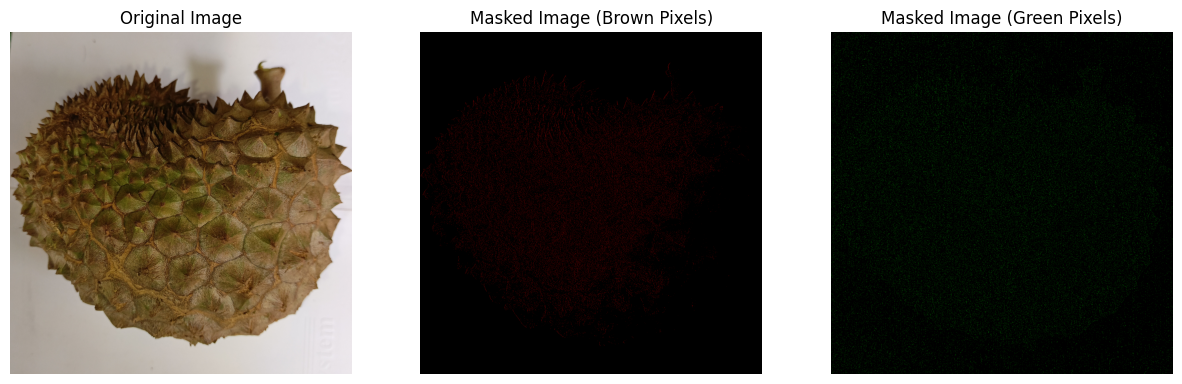

Brown Percentage:  0.4626071115906016
Green Percentage:  0.5373928884093984
Ripeness Reading:  Unripe


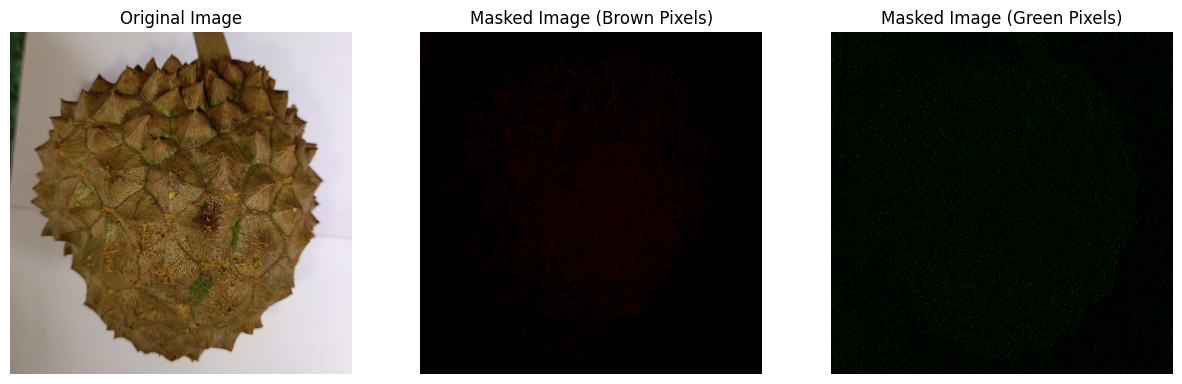

Brown Percentage:  0.416
Green Percentage:  0.584
Ripeness Reading:  Unripe


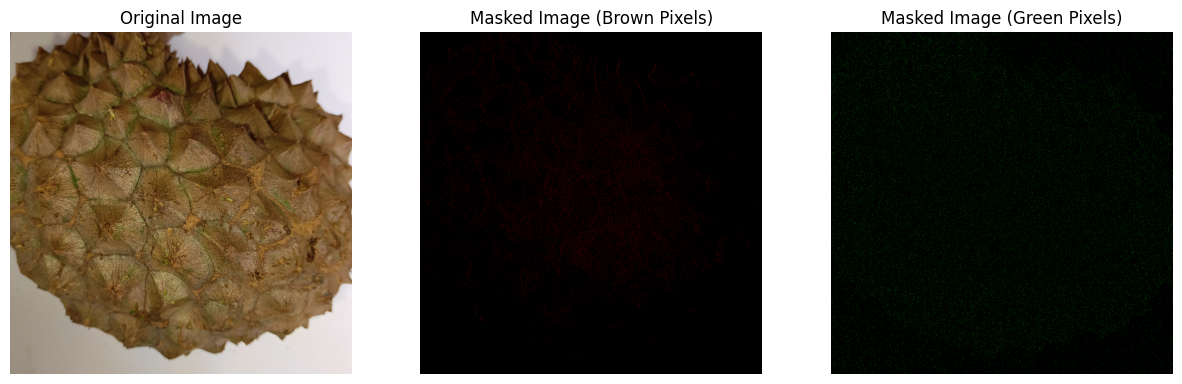

Brown Percentage:  0.3580511592766663
Green Percentage:  0.6419488407233337
Ripeness Reading:  Unripe


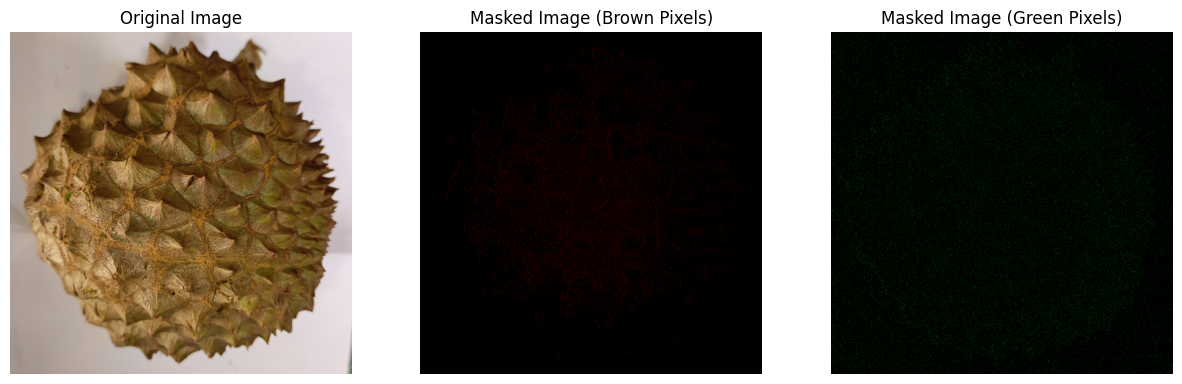

Brown Percentage:  0.38517165706879536
Green Percentage:  0.6148283429312046
Ripeness Reading:  Unripe


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from PIL import Image

def calculate_accuracy(image_data):
    brown_pixel_count = 0
    green_pixel_count = 0
    brown_masked = np.zeros_like(image_data)
    green_masked = np.zeros_like(image_data)

    for j in range(0, len(image_data), 3):
        r = image_data[j]
        g = image_data[j + 1]
        b = image_data[j + 2]

        is_brown = (r >= g) & (g > b) & (r >= 10) & (r <= 200) & (g >= r / 4) & (b <= (g-(g/4)))
        is_green = (g > r) & (g > b) & (r > b)

        if is_brown.any():
            brown_pixel_count += 1
            brown_masked[j] = 255
            brown_masked[j + 1] = 0
            brown_masked[j + 2] = 0
            green_masked[j] = 0
            green_masked[j + 1] = 0
            green_masked[j + 2] = 0
        elif is_green.any():
            green_pixel_count += 1
            brown_masked[j] = 0
            brown_masked[j + 1] = 0
            brown_masked[j + 2] = 0
            green_masked[j] = 0
            green_masked[j + 1] = 255
            green_masked[j + 2] = 0
        else:
            brown_masked[j] = 0
            brown_masked[j + 1] = 0
            brown_masked[j + 2] = 0
            green_masked[j] = 0
            green_masked[j + 1] = 0
            green_masked[j + 2] = 0

    brown_percentage = brown_pixel_count / (brown_pixel_count + green_pixel_count)
    green_percentage = green_pixel_count / (brown_pixel_count + green_pixel_count)

    return brown_percentage, green_percentage, brown_masked, green_masked


def main(image_path):
    image = Image.open(image_path)
    width, height = image.size
    size = min(width, height)
    start_x = 0
    start_y = (height - size) // 2
    cropped_image = image.crop((start_x, start_y, start_x + size, start_y + size))
    image_data = np.array(cropped_image)
    image_data = image_data.reshape(-1, image_data.shape[-1])
    brown_percentage, green_percentage, brown_masked, green_masked = calculate_accuracy(image_data)

    masked_brown = np.where(brown_masked[:, :3] == [255, 0, 0], [255, 0, 0], [0, 0, 0]).reshape(cropped_image.size[::-1] + (3,))
    masked_green = np.where(green_masked[:, :3] == [0, 255, 0], [0, 255, 0], [0, 0, 0]).reshape(cropped_image.size[::-1] + (3,))

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cropped_image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(masked_brown)
    plt.title('Masked Image (Brown Pixels)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(masked_green)
    plt.title('Masked Image (Green Pixels)')
    plt.axis('off')
    plt.show()

    if brown_percentage > green_percentage:
        ripeness = "Ripe"
    else:
        ripeness = "Unripe"

    return brown_percentage, green_percentage, ripeness

brown_percentage, green_percentage, ripeness = main('/content/drive/MyDrive/dataset/manuscript/2024-05-14 08_43_38.932229.jpg')
print("Brown Percentage: ", brown_percentage)
print("Green Percentage: ", green_percentage)
print("Ripeness Reading: ", ripeness)
brown_percentage, green_percentage, ripeness = main('/content/drive/MyDrive/dataset/manuscript/2024-05-14 08_43_38.935278.jpg')
print("Brown Percentage: ", brown_percentage)
print("Green Percentage: ", green_percentage)
print("Ripeness Reading: ", ripeness)
brown_percentage, green_percentage, ripeness = main('/content/drive/MyDrive/dataset/manuscript/2024-05-14 08_43_38.935579.jpg')
print("Brown Percentage: ", brown_percentage)
print("Green Percentage: ", green_percentage)
print("Ripeness Reading: ", ripeness)
brown_percentage, green_percentage, ripeness = main('/content/drive/MyDrive/dataset/manuscript/2024-05-14 08_43_38.935848.jpg')
print("Brown Percentage: ", brown_percentage)
print("Green Percentage: ", green_percentage)
print("Ripeness Reading: ", ripeness)

#Results and Analysis

    Actual CNN Predictions Color Predictions ANN Predictions Overall Predictions
0     Ripe            Ripe              Ripe          Unripe                Ripe
1     Ripe            Ripe              Ripe            Ripe                Ripe
2     Ripe          Unripe              Ripe            Ripe                Ripe
3     Ripe          Unripe              Ripe            Ripe                Ripe
4     Ripe            Ripe              Ripe            Ripe                Ripe
5     Ripe          Unripe              Ripe            Ripe                Ripe
6     Ripe          Unripe              Ripe            Ripe                Ripe
7     Ripe          Unripe              Ripe            Ripe                Ripe
8     Ripe            Ripe              Ripe            Ripe                Ripe
9     Ripe          Unripe              Ripe          Unripe              Unripe
10  Unripe          Unripe              Ripe          Unripe              Unripe
11  Unripe          Unripe  

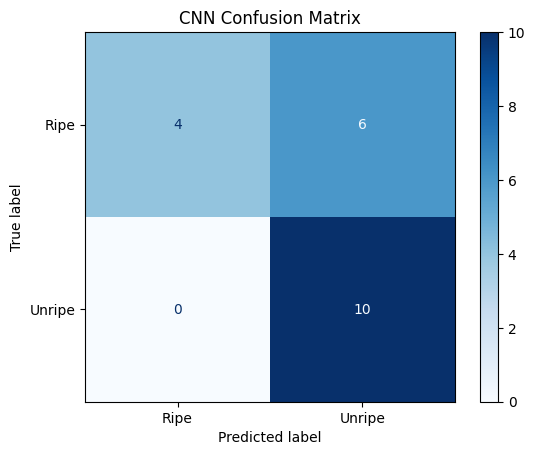

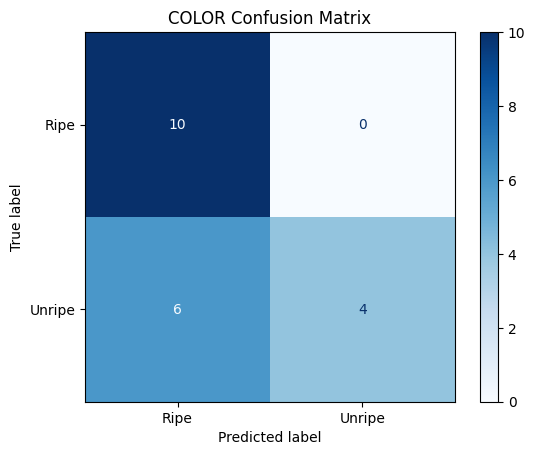

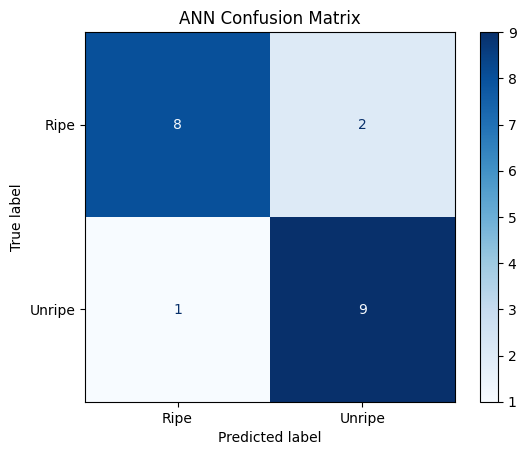

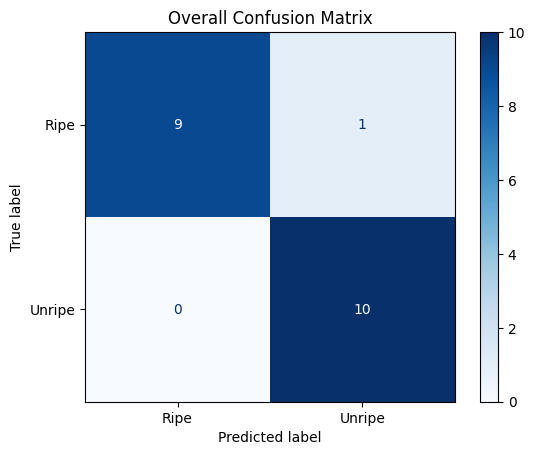

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, ConfusionMatrixDisplay

actual = ['Ripe'] * 10 + ['Unripe'] * 10
cnn_predictions = ['Ripe', 'Ripe', 'Unripe', 'Unripe', 'Ripe', 'Unripe', 'Unripe', 'Unripe', 'Ripe', 'Unripe',
                   'Unripe', 'Unripe', 'Unripe', 'Unripe', 'Unripe', 'Unripe', 'Unripe', 'Unripe', 'Unripe', 'Unripe']
color_predictions = ['Ripe', 'Ripe', 'Ripe', 'Ripe', 'Ripe', 'Ripe', 'Ripe', 'Ripe', 'Ripe', 'Ripe',
                    'Ripe', 'Ripe', 'Ripe', 'Ripe', 'Ripe', 'Unripe', 'Unripe', 'Unripe', 'Unripe', 'Ripe']
ann_predictions = ['Unripe', 'Ripe', 'Ripe', 'Ripe', 'Ripe', 'Ripe', 'Ripe', 'Ripe', 'Ripe', 'Unripe',
                   'Unripe', 'Unripe', 'Unripe', 'Unripe', 'Unripe', 'Ripe', 'Unripe', 'Unripe', 'Unripe', 'Unripe']
overall_predictions = ['Ripe', 'Ripe', 'Ripe', 'Ripe', 'Ripe', 'Ripe', 'Ripe', 'Ripe', 'Ripe', 'Unripe',
                       'Unripe', 'Unripe', 'Unripe', 'Unripe', 'Unripe', 'Unripe', 'Unripe', 'Unripe', 'Unripe', 'Unripe']
data = {
    "Actual": actual,
    "CNN Predictions": cnn_predictions,
    "Color Predictions": color_predictions,
    "ANN Predictions": ann_predictions,
    "Overall Predictions": overall_predictions
}

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df = pd.DataFrame(data)
print(df)

def calculate_metrics(actual, predictions, method_name):
    precision = precision_score(actual, predictions, pos_label='Ripe')
    recall = recall_score(actual, predictions, pos_label='Ripe')
    f1 = f1_score(actual, predictions, pos_label='Ripe')
    accuracy = accuracy_score(actual, predictions)

    print("-" + "-"*20)
    print(f"{method_name} Results")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"Accuracy: {accuracy:.2f}")
    print("-" + "-"*20)

    return precision, recall, f1

cnn_metrics = calculate_metrics(actual, cnn_predictions, 'CNN')
color_metrics = calculate_metrics(actual, color_predictions, 'COLOR')
ann_metrics = calculate_metrics(actual, ann_predictions, 'ANN')
overall_metrics = calculate_metrics(actual, overall_predictions, 'Overall')

def plot_confusion_matrix_heatmap(actual, predictions, title):
    cm = confusion_matrix(actual, predictions, labels=['Ripe', 'Unripe'])
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ripe', 'Unripe'])
    cm_display.plot(cmap='Blues')
    plt.title(title)
    plt.show()

plot_confusion_matrix_heatmap(actual, cnn_predictions, 'CNN Confusion Matrix')
plot_confusion_matrix_heatmap(actual, color_predictions, 'COLOR Confusion Matrix')
plot_confusion_matrix_heatmap(actual, ann_predictions, 'ANN Confusion Matrix')
plot_confusion_matrix_heatmap(actual, overall_predictions, 'Overall Confusion Matrix')